###  인스타그램 Crawling 연습1(제주도맛집500개소)

In [16]:
from selenium import webdriver
driver = webdriver.Chrome("../driver/chromedriver.exe")

In [17]:
import time
driver.get('https://www.instargram.com')
time.sleep(2)

In [18]:
#인스타계정으로 로그인하기

email = 'suhbongkyo'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '*******!'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

In [19]:
def insta_searching(word):
  url = 'https://www.instagram.com/explore/tags/'  + word 
  return url

In [1]:
word = '제주맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div/ul/li[1]').click()
time.sleep(3)

In [ ]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
   
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
    
    # 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    
    #년월 정보만 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아요 수 가져오기

    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
   
  # 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)


In [ ]:
def move_next(driver):

    right = driver.find_element_by_css_selector ('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [ ]:
word = "제주맛집" 
url = insta_searching(word)
time.sleep(3)

driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div/ul/li[1]').click()
time.sleep(3)

driver.get(url)
time.sleep(3)

select_first(driver)

results = [ ]



target = 10    
for i in range(target):
    try:
        data = get_content(driver) 
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

In [88]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('../data/crawling_jejudoMatJip500saved.xlsx')


In [2]:
jeju_insta_df = pd.DataFrame( [ ] )

f_list = ['../data/Jeju_mapjib_crawling.xlsx']
for fname in f_list:
    fpath = fname
    print(fpath)
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']


In [91]:
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
print(jeju_insta_df)
jeju_insta_df.to_excel('../data/Jeju_mapjib_crawling.xlsx', index = False)


                                               content        data   like  \
0    부드러운 갈치가 통으로 들어가서비주얼부터 끝내줬던 #중문수원음식점 의통갈치조림👍👍통...  2020-12-18      0   
1    (🐙광고)돌문어볶음 제주가면 꼭 먹어봐야할 곳 살아있는돌문어로 볶음요리 평대리멍석 ...  2020-12-18      0   
2    <광고>.섬마을청년회관에서즐기는 특별한 메뉴!고사리 파스타와 전복게우밥흑돼지돈까스까...  2020-12-18  1,520   
3    (광고)제주에서 만나는 진짜제주감성🤎맛집중에 맛집! Best of best! 제주 ...  2020-12-17      0   
4    <광고>매일가고 싶은 제주도..볼것도 많고 먹을것도 많고제주하면 유명한 음식중 하나...  2020-12-17      0   
..                                                 ...         ...    ...   
481  시간 날때마다 틈틈이 하는일 바로 마스크랑 스트랩 포장 하는일~♡저희매장은 만원이상...  2020-12-18     17   
482      다른 샐러드 집보다 더 든든한 느낌미니마이즈 포장하고 보울박스 들리면 먹코스 완성  2020-12-18     24   
483  안녕하세요 모록도야지입니다🙃🙃조금은 기온이 올라간 금요일 입니다😄오늘도 여전히 방문...  2020-12-18     27   
485  딸기케이크 맛집 한라드블랑 ! 12월 18일 준비한 맛있는 케이크 메뉴딸기생크림케이...  2020-12-18     37   
487  이색4가지소스와 함께 즐길 수 있는 흑돼지 전문점 까망돼지육지체인점이 아닌 제주도에...  2020-12-18    NaN   

                                                 place  \
0    부드러운 갈치가 통으로

In [92]:
import pandas as pd
raw = pd.read_excel('../data/Jeju_mapjib_crawling.xlsx')
raw['tags'][:3]

0    ['#중문수원음식점', '#제주맛집', '#제주도맛집', '#중문갈치조림', '#제...
1    ['#월정리맛집', '#세화맛집', '#제주도맛집', '#성산맛집', '#함덕맛집'...
2    ['#제주도맛집', '#제주맛집', '#도두무지개해안도로', '#제주도민추천', '...
Name: tags, dtype: object

In [93]:
tags_total = []

for tags in raw['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
tags_total

['#중문수원음식점',
 '#제주맛집',
 '#제주도맛집',
 '#중문갈치조림',
 '#제주중문맛집',
 '#중문갈치조림맛집',
 '#중문맛집추천',
 '#중문관광단지맛집',
 '#제주도갈치조림맛집',
 '#제주갈치조림',
 '#서귀포맛집추천',
 '#월정리맛집',
 '#세화맛집',
 '#제주도맛집',
 '#성산맛집',
 '#함덕맛집',
 '#바닷가앞맛집',
 '#제주뷰맛집',
 '#서귀포맛집',
 '#제주시맛집',
 '#제주도맛집추천',
 '#제주월정리맛집',
 '#구좌읍맛집',
 '#제주도맛집',
 '#제주맛집',
 '#도두무지개해안도로',
 '#제주도민추천',
 '#제주돈까스',
 '#제주시내맛집',
 '#제주도파스타',
 '#제주용두암맛집',
 '#제주공항근처맛집추천',
 '#탑동맛집',
 '#제주레스토랑',
 '#제주도용두암맛집',
 '#제주도맛집',
 '#구좌읍맛집',
 '#구좌맛집',
 '#성산일출봉맛집',
 '#성산맛집',
 '#종달리맛집',
 '#제주맛집',
 '#제주도맛집',
 '#세화맛집',
 '#월정리맛집',
 '#미로공원맛집',
 '#빛의벙커맛집',
 '#만장굴맛집',
 '#비자림맛집',
 '#우도맛집',
 '#종달리수국',
 '#에코랜드맛집',
 '#성산게스트하우스',
 '#제주맛집추천',
 '#제주분위기맛집',
 '#제주노을맛집',
 '#산도롱맨도롱🌀제주시',
 '#제주맛집',
 '#제주도맛집',
 '#월정리맛집',
 '#성산맛집',
 '#성산일출봉맛집',
 '#구좌맛집',
 '#구좌읍맛집',
 '#세화맛집',
 '#제주도여행',
 '#제주여행',
 '#안돌오름',
 '#애월맛집',
 '#제주맛집',
 '#제주도맛집',
 '#애월해안도로맛집',
 '#제주공항주변맛집',
 '#제주공항근처아침식사',
 '#제주도고등어쌈밥',
 '#제주도민맛집추천',
 '#제주도민추천맛집',
 '#제주도맛집',
 '#제주가볼만한곳',
 '#제주애월맛집',
 '#제주핫플',
 '#제주도카페맛집',
 '#애월카페',
 '#제주도데이트',
 '#제주도흑돼지맛집

In [94]:
# 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [79]:
# 가장 많이 사용된(빈도수가 높은) 해시태그 살펴보기 
tag_counts.most_common(50)

[('#제주맛집', 3523),
 ('#제주도맛집', 3357),
 ('#제주여행', 3083),
 ('#제주관광', 2827),
 ('#제주도', 2105),
 ('#제주', 1574),
 ('#제주도여행', 1522),
 ('#서귀포맛집', 1379),
 ('#제주도가볼만한곳', 1042),
 ('#제주핫플레이스', 840),
 ('#서귀포', 828),
 ('#jeju', 764),
 ('#일상', 720),
 ('#제주맛집추천', 702),
 ('#제주흑돼지맛집', 693),
 ('#제주도흑돼지맛집', 676),
 ('#제주도흑돼지', 668),
 ('#성산일출봉', 654),
 ('#제주흑돼지', 652),
 ('', 645),
 ('#협재맛집', 631),
 ('#제주카페', 625),
 ('#서귀포흑돼지맛집', 600),
 ('#제주도그램', 597),
 ('#서귀포흑돼지', 579),
 ('#제주도민', 578),
 ('#섭지코지', 557),
 ('#성산일출봉맛집', 555),
 ('#섭지코지맛집', 512),
 ('#제주가볼만한곳', 509),
 ('#선팔', 508),
 ('#제주핫플', 501),
 ('#제주도민맛집', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주살이', 483),
 ('#제주서귀포맛집', 481),
 ('#여행스타그램', 476),
 ('#여행', 447),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#제주눈썹문신', 434),
 ('#중문맛집', 431),
 ('#제주시', 420),
 ('#서귀포눈썹문신', 420),
 ('#애월맛집', 417),
 ('#먹스타그램', 416),
 ('#제주스타그램', 411),
 ('#반영구', 406),
 ('#눈썹문신', 405)]

In [95]:
#  데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#제주도맛집', 208),
 ('#제주맛집', 111),
 ('#제주도여행', 68),
 ('#제주여행', 63),
 ('', 57),
 ('#서귀포맛집', 49),
 ('#애월맛집', 44),
 ('#제주', 36),
 ('#제주도카페', 31),
 ('#협재맛집', 29),
 ('#한림맛집', 28),
 ('#제주도가볼만한곳', 28),
 ('#제주맛집추천', 27),
 ('#중문맛집', 27),
 ('#제주공항근처맛집', 26),
 ('#제주시맛집', 25),
 ('#제주공항맛집', 25),
 ('#제주카페', 25),
 ('#제주도맛집추천', 22),
 ('#먹스타그램', 21),
 ('#제주도민맛집', 20),
 ('#제주핫플', 18),
 ('#곽지맛집', 17),
 ('#오설록맛집', 16),
 ('#제주갈치조림맛집', 16),
 ('#한담맛집', 15),
 ('#동문시장맛집', 13),
 ('#서귀포카페', 13),
 ('#협재해수욕장', 13),
 ('#월정리맛집', 12),
 ('#함덕맛집', 12),
 ('#제주가볼만한곳', 12),
 ('#제주도핫플레이스', 12),
 ('#서귀포맛집까망돼지', 12),
 ('#맛스타그램', 12),
 ('#제주중문맛집', 11),
 ('#제주도여행코스', 11),
 ('#중문흑돼지맛집', 11),
 ('#여행', 11),
 ('#ootd', 11),
 ('#좋아요반사', 11),
 ('#연동제주분식', 11),
 ('#협재해수욕장맛집', 11),
 ('#좋아요', 11),
 ('#성산일출봉맛집', 10),
 ('#우도맛집', 10),
 ('#애월카페', 10),
 ('#하귀맛집', 10),
 ('#제주도핫플', 10),
 ('#likeforlikes', 10)]

In [96]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

font_name = "malgun gothic"
rc('font',family=font_name)

In [97]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

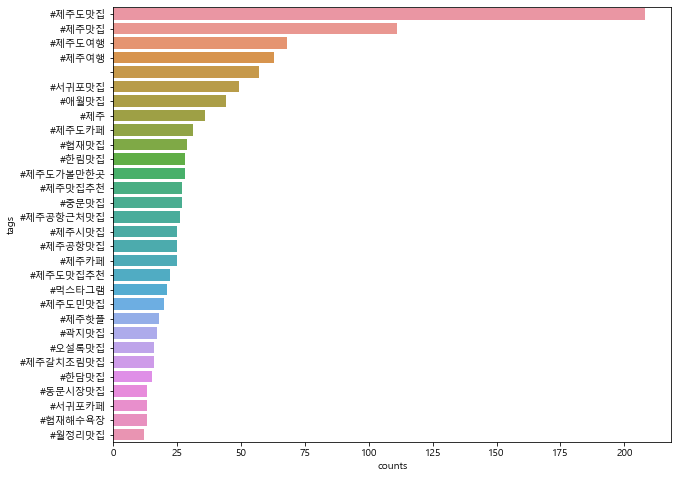

In [98]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [99]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud    
import platform

font_path = "c:/Windows/Fonts/malgun.ttf"


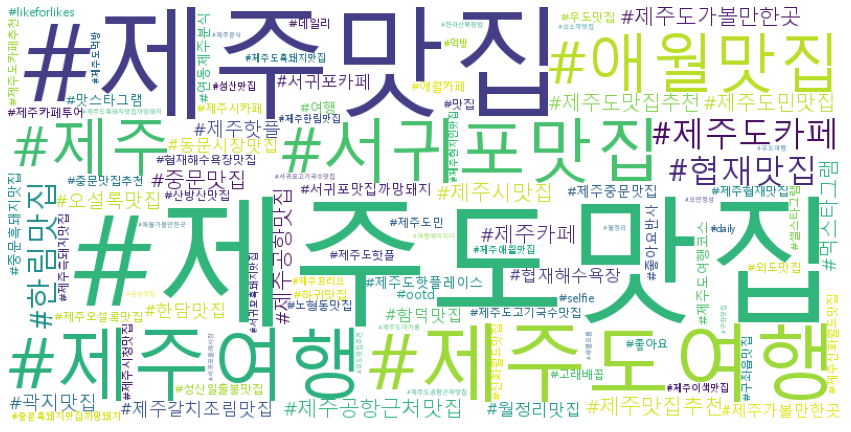

In [100]:

wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../data/jejudoMatJip500saved_wordcloud.png')  